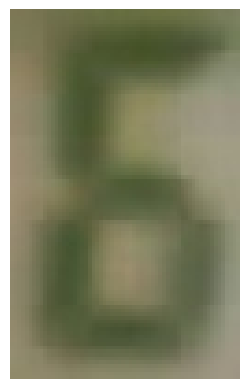

In [1]:
# Show Image
import cv2
import matplotlib.pyplot as plt

def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis("off")  # Hide axes
    plt.show()
# Load Image
img = cv2.imread('/kaggle/input/digits250401/img_48_20240313_093839_4.jpg')

# plt.figure(figsize=(8, 6))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

show_image(img)

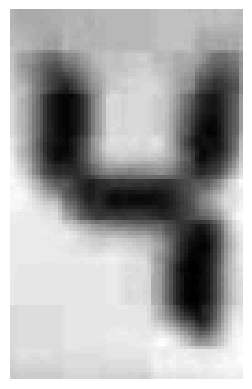

In [2]:
# Convert Color Space
import cv2
import matplotlib.pyplot as plt

def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis("off")  # Hide axes
    plt.show()
# Load Image
img = cv2.imread('/kaggle/input/digits250401/img_13_20240311_165642_1.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

show_image(img)

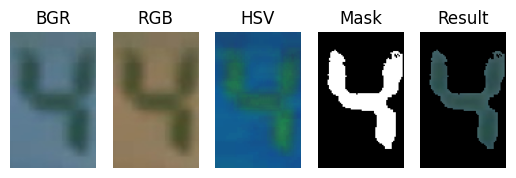

In [3]:
# Object Tracking
import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_images(imgs, titles):
    fig, axe = plt.subplots(1, len(imgs))
    for ax, img, title in zip(axe, imgs, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis("off")  # Hide axes
    plt.show()
# Load Image
img = cv2.imread('/kaggle/input/digits250401/img_13_20240311_165642_1.jpg')

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_green = np.array([25,75,76])
upper_green = np.array([40,136,104])

mask = cv2.inRange(hsv, lower_green, upper_green)

result = cv2.bitwise_and(img, img, mask=mask)

show_images([img, rgb, hsv, mask, result], ["BGR", "RGB", "HSV", "Mask", "Result"])


In [4]:
# Get color range for mask using sliders

import cv2
import numpy as np
import base64
from io import BytesIO
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

# Load Image
img = cv2.imread('/kaggle/input/digits250401/img_13_20240311_165642_1.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

def convert_to_base64(image):
    """Converts an OpenCV image to Base64 for embedding in an <img> tag."""
    _, buffer = cv2.imencode('.png', image)
    return base64.b64encode(buffer).decode('utf-8')

def update_mask(change=None):
    """Updates the mask and displays it inside an HTML <img> tag."""
    lower_hsv = np.array([lower_sliders[0].value, lower_sliders[1].value, lower_sliders[2].value])
    upper_hsv = np.array([upper_sliders[0].value, upper_sliders[1].value, upper_sliders[2].value])

    mask = cv2.inRange(hsv, lower_hsv, upper_hsv)
    result = cv2.bitwise_and(img, img, mask=mask)

    # Convert images to Base64
    original_b64 = convert_to_base64(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    mask_b64 = convert_to_base64(mask)
    result_b64 = convert_to_base64(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

    # Update HTML with images
    img_html = f"""
    <div style="display: flex; justify-content: center; gap: 20px;">
        <div>
            <p>Original Image</p>
            <img src="data:image/png;base64,{original_b64}" width="200">
        </div>
        <div>
            <p>Mask</p>
            <img src="data:image/png;base64,{mask_b64}" width="200">
        </div>
        <div>
            <p>Filtered Result</p>
            <img src="data:image/png;base64,{result_b64}" width="200">
        </div>
    </div>
    """
    image_display.value = img_html  # Update widget

def create_color_selector(title, initial_hsv):
    """Creates an HSV selector with sliders."""
    color_picker = widgets.ColorPicker(
        description='Pick Color',
        value=f'#{initial_hsv[0]:02x}{initial_hsv[1]:02x}{initial_hsv[2]:02x}'
    )

    sliders = [
        widgets.IntSlider(min=0, max=180, step=1, value=initial_hsv[0], description='H'),
        widgets.IntSlider(min=0, max=255, step=1, value=initial_hsv[1], description='S'),
        widgets.IntSlider(min=0, max=255, step=1, value=initial_hsv[2], description='V')
    ]

    # Sync color picker with sliders
    color_picker.observe(lambda change: update_sliders_from_picker(change, sliders), names='value')

    # Ensure sliders trigger `update_mask()`
    for slider in sliders:
        slider.observe(update_mask, names='value')

    return widgets.VBox([widgets.HTML(f"<h3>{title}</h3>"), color_picker] + sliders), sliders

def update_sliders_from_picker(change, sliders):
    """Updates HSV sliders when a color is picked."""
    hex_color = change['new'].lstrip('#')
    rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    hsv = cv2.cvtColor(np.uint8([[rgb]]), cv2.COLOR_RGB2HSV)[0][0]

    sliders[0].value, sliders[1].value, sliders[2].value = hsv
    update_mask()

# Create UI for HSV selection
lower_selector, lower_sliders = create_color_selector("Lower HSV Range", (25, 75, 76))
upper_selector, upper_sliders = create_color_selector("Upper HSV Range", (40, 136, 104))

# HTML widget to display images
image_display = widgets.HTML()

# Display UI
display(widgets.HBox([lower_selector, upper_selector]))
display(image_display)

# Run initial mask update
update_mask()


HTML(value='')